In [7]:
import re
import os

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

def collect_eval_result():
    arr = []
    for model_dir in os.listdir('./output'):
        res = re.match(r'^(.*?)-(.*?)-(.*?)-(.*?)$', model_dir)

        if res is None:
            continue
        model_name, opt_name, learning_rate, batch_size = res[1], res[2], res[3], res[4]
        loss, acc = None, None
        with open(f'./output/{model_dir}/eval_res.txt', 'r') as f:
            s = f.read()
            res1 = re.match(r"^\{'loss': \[(.*?)], 'acc': (.*?)}$", s)
            loss, acc = res1[1], res1[2]
        # print(model_name, opt_name, learning_rate, batch_size, loss, acc)
        arr.append({
            'model_name': model_name,
            'opt_name': opt_name,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'loss': loss,
            'acc': acc
        })
    df = pd.DataFrame(arr)
    df.to_csv('./eval_result.csv')


Text(0.5, 1.0, 'LeNet-Momentum Acc Heatmap')

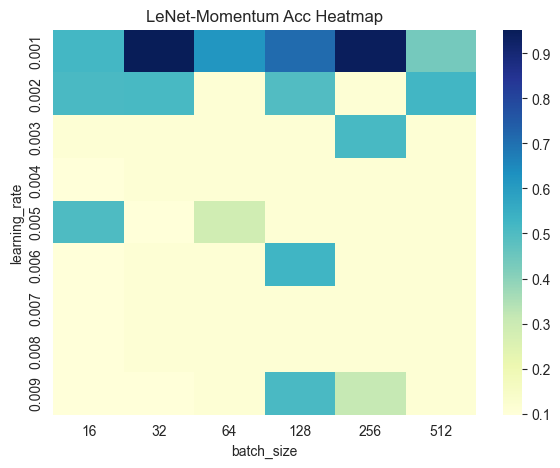

In [8]:
collect_eval_result()
df = pd.read_csv('./eval_result.csv')

# df = pd.DataFrame({
#     'learn_rate': learn_rates,
#     'batch_size': batch_sizes,
#     'loss': losses,
#     'acc': accs
# })

# name = re.match(r".*/(.*?-.*?)-.*", dir)[1]

LeNetMomentumResult = df[(df['model_name'] == 'LeNet') & (df['opt_name'] == 'Momentum') & (df['learning_rate'] != 0.01)]
LeNetMomentumResult
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
mat = df.pivot_table(index='learning_rate', columns='batch_size', values='acc')[0.001:0.009]
# mat
sns.heatmap(mat, cmap='YlGnBu')
plt.title(f'LeNet-Momentum Acc Heatmap')

In [2]:
import os
os.getcwd()

'F:\\Dev\\AIFundationProject'